In [1]:
try:
    import tensorflow_probability.substrates.jax as tfp
except ModuleNotFoundError:
    %pip install tensorflow_probability
    import tensorflow_probability.substrates.jax as tfp

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
%matplotlib inline

/Users/nipun/miniconda3/lib/python3.8/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
dist = tfp.distributions

In [3]:
norm = dist.Normal(loc = 0.0, scale = 1.0)

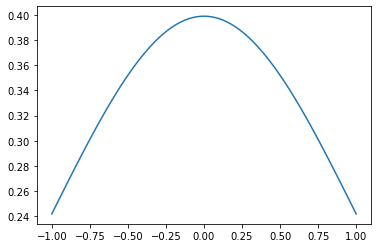

In [4]:
x = jnp.linspace(-1, 1., 100)
pdf = norm.prob(x)
plt.plot(x, pdf)

What does `norm.prob` return?

In [5]:
help(norm.prob)

Help on method prob in module tensorflow_probability.substrates.jax.distributions.distribution:

prob(value, name='prob', **kwargs) method of tensorflow_probability.substrates.jax.distributions.normal.Normal instance
    Probability density/mass function.
    
    Args:
      value: `float` or `double` `Tensor`.
      name: Python `str` prepended to names of ops created by this function.
      **kwargs: Named arguments forwarded to subclass implementation.
    
    Returns:
      prob: a `Tensor` of shape `sample_shape(x) + self.batch_shape` with
        values of type `self.dtype`.



Is the density 0 at x = 5?

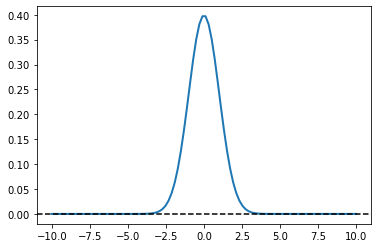

In [6]:
x = jnp.linspace(-10, 10., 100)
pdf = norm.prob(x)
plt.plot(x, pdf, lw=2)
plt.axhline(0, color='k', linestyle='--')

Using logprob

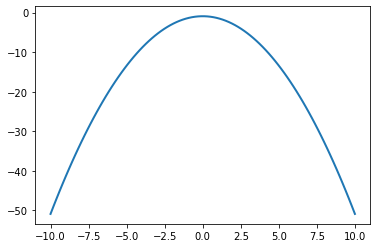

In [7]:
x = jnp.linspace(-10, 10., 100)
pdf = norm.log_prob(x)
plt.plot(x, pdf, lw=2)

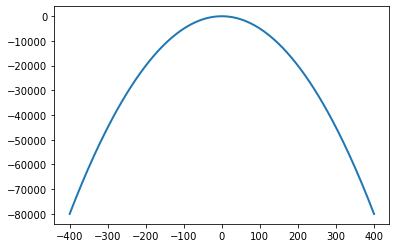

In [8]:
x = jnp.linspace(-400, 400., 200)
pdf = norm.log_prob(x)
plt.plot(x, pdf, lw=2)

$\ell_{x}\left(\mu, \sigma^{2}\right)=-\ln \sigma-\frac{1}{2} \ln (2 \pi)-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}$

In [9]:
def log_prob(norm, x):
    mu = norm.mean()
    scale = norm.scale
    
    return -1*jnp.log(scale) - 0.5*jnp.log(2*jnp.pi) - 0.5*(((x - mu)/scale)**2)

In [10]:
log_prob(norm, -5)

DeviceArray(-13.418939, dtype=float32)

In [11]:
norm.log_prob(-5)

DeviceArray(-13.418939, dtype=float32)

In [12]:
jnp.exp(log_prob(norm, -20)), jnp.exp(norm.log_prob(-20))

(DeviceArray(0., dtype=float32), DeviceArray(0., dtype=float32))

Is likelihood upper bounded by 1?

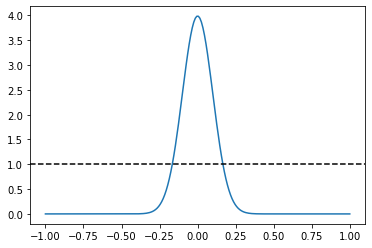

In [13]:
norm_2 = dist.Normal(loc = 0., scale = 0.1)
x = jnp.linspace(-1, 1., 200)
pdf_2 = norm_2.prob(x)
plt.plot(x, pdf_2)
plt.axhline(1, color='k', linestyle='--')

In [14]:
norm_2.prob(0.)

DeviceArray(3.989423, dtype=float32)

The above value is greater than 1

In [15]:
def l(loc, scale = 0.1, x = 0.0):
    n = dist.Normal(loc = loc, scale = scale)
    return n.prob(x)


In [16]:
l(1.)

DeviceArray(7.6946093e-22, dtype=float32)

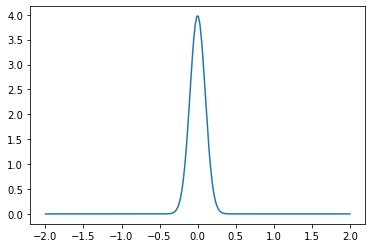

In [21]:
x_range = jnp.linspace(-2, 2, 200)
lis = jax.vmap(l, in_axes=(0, None, None))(x_range, 0.1, 0.0)
plt.plot(x_range, lis)